In [16]:
import MeCab
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlibで日本語表示
import japanize_matplotlib
import mojimoji
import re

class CustomMeCabTagger(MeCab.Tagger):
    
    COLUMNS = ['表層形', '品詞', '品詞細分類1', '品詞細分類2', 
               '品詞細分類3', '活用型', '活用形', '原形', '読み', '発音']

    def parseToDataFrame(self, text: str) -> pd.DataFrame:
        '''
        input: 分析対象のテキスト
        output: 分析結果のデータフレーム型
        '''
        
        results = []
        
        for line in self.parse(text).split('\n'):
            if line == 'EOS':
                break
            surface, feature = line.split('\t')
            feature = [None if f == '*' else f for f in feature.split(',')]
            # *: listのアンパック
            results.append([surface, *feature])
        
        return pd.DataFrame(results, columns=self.COLUMNS)

In [28]:
# 全角数字を半角数字に変換
with open('sample.md', 'r') as f:
    s = f.read()
    # 「、。」-> 「，．」
    s_punctuation1 = re.sub('。', '．', s)
    s_punctuation2 = re.sub('、', '，', s_punctuation1)
    # 全角数字 -> 半角数字
    s_suji = mojimoji.zen_to_han(s_punctuation2, kana=False)
with open('sample_after.md', 'w') as f:
    f.write(s_suji)

tagger = CustomMeCabTagger()

# テキストの読込
with open('sample.md', 'r') as f:
    s = f.read()
    s_re = re.sub('<figure*figure>', '', s)
    df = tagger.parseToDataFrame(s)

In [3]:
# 前処理
df_remove_joshi = df[df['品詞'] != '助詞']
# df_remove_joshi['表層形'].value_counts()
df_remove_kigou = df_remove_joshi[df_remove_joshi['品詞'] != '記号']
# df_remove_kigou['表層形'].value_counts()

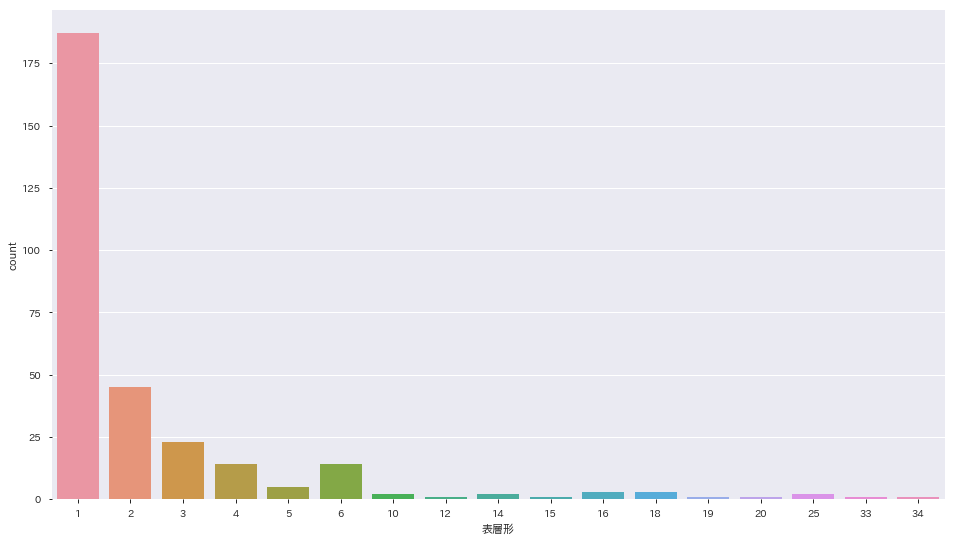

In [4]:
# 可視化
plt.figure(figsize=(16, 9))
sns.countplot(x=df['表層形'].value_counts())

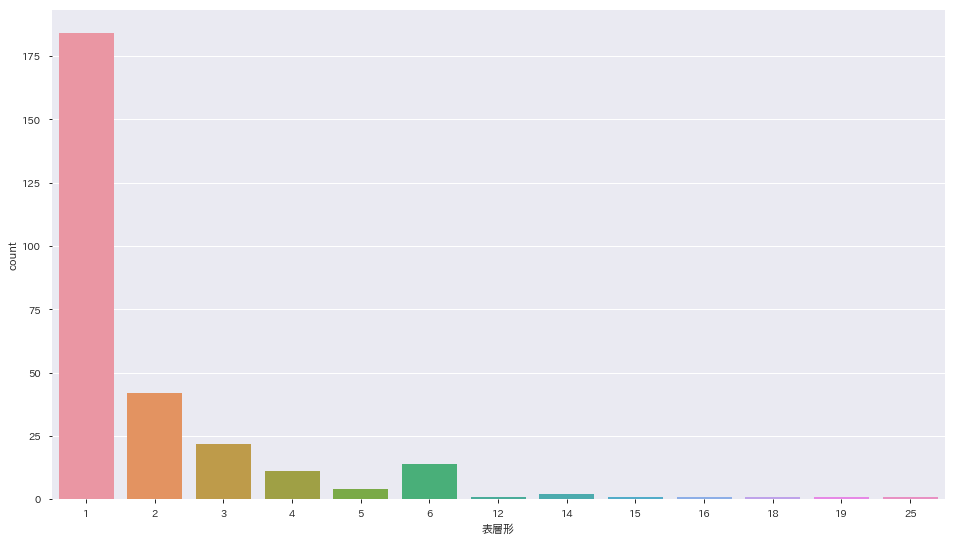

In [5]:
plt.figure(figsize=(16, 9))
sns.countplot(x=df_remove_kigou['表層形'].value_counts())

In [6]:
pdp.ProfileReport(df_remove_kigou)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
